In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [108]:
data = pd.read_csv('monthly_data_10.csv')

In [ ]:
"""After removing majority-null and duplicate columns, there are 46 features.
"""

In [112]:
X = data.drop(['raw_target', 'target_encoded', 'product'], axis = 1) #product is already in there unnested
y = binary_target

In [115]:
raw_target = data['raw_target']
binary_target = data['target_encoded'] 

In [114]:
X.shape

In [114]:
"""When examining the target, there are 13.69% Add to Cart events and 86.31% other events"""

(66514, 46)

,count,percent
raw_target,,
Quickview Click,31025,46.644315
Promotion Click,13014,19.565806
Add to Cart,9107,13.691854
Product Click,7452,11.203656
Onsite Click,4620,6.945906
Remove from Cart,1296,1.948462


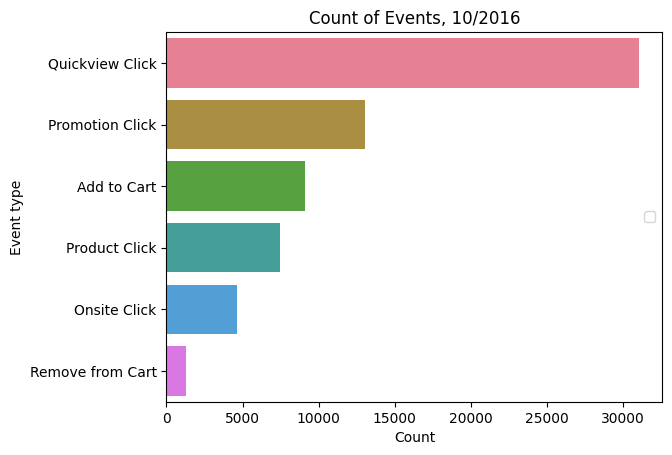

In [111]:
#distribution of events
ax = sns.barplot(y = raw_target.value_counts().index, 
            x = raw_target.value_counts().values, 
            hue = raw_target.value_counts().index , 
            palette = sns.color_palette('husl'), dodge = False)
plt.legend([])
plt.xlabel("Count")
plt.ylabel("Event type")
plt.title("Count of Events, 10/2016")

event_counts = pd.DataFrame(raw_target.value_counts())
event_counts['percent'] = event_counts['count'] /len(raw_target.index)*100
event_counts.head(6)


In [116]:
X.columns

Index(['date', 'visitId', 'productSKU', 'v2ProductName', 'v2ProductCategory',
       'productPrice', 'localProductPrice', 'isClick', 'productListName',
       'productListPosition', 'hitNumber', 'time', 'hour', 'minute',
       'page.pagePath', 'page.hostname', 'page.pageTitle',
       'page.pagePathLevel1', 'page.pagePathLevel2', 'page.pagePathLevel3',
       'appInfo.screenName', 'appInfo.landingScreenName',
       'appInfo.exitScreenName', 'eventInfo.eventCategory',
       'eventInfo.eventAction', 'eventInfo.eventLabel',
       'eCommerceAction.action_type', 'social.hasSocialSourceReferral',
       'contentGroup.contentGroup2', 'contentGroup.previousContentGroup2',
       'source', 'browser', 'operatingSystem', 'isMobile', 'deviceCategory',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'networkDomain', 'hits', 'pageviews', 'timeOnSite', 'newVisits'],
      dtype='object')

In [138]:
listpos = pd.concat([X['productListPosition'], raw_target], axis=1)

,productListPosition,raw_target
0,NaN,Promotion Click
1,NaN,Promotion Click
2,NaN,Promotion Click
3,NaN,Promotion Click
4,NaN,Promotion Click
...,...,...
66509,10.0,Product Click
66510,0.0,Quickview Click
66511,0.0,Quickview Click
66512,0.0,Quickview Click


In [117]:
temp_x = X['timeOnSite']

In [118]:
sitetime = pd.concat([temp_x, raw_target], axis = 1)

Text(0.5, 1.02, '*Outliers excluded')

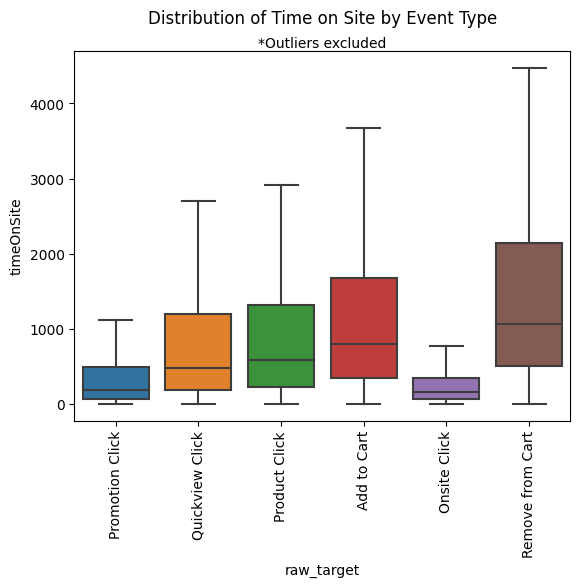

In [159]:
sns.boxplot(x=raw_target, y = X['timeOnSite'], showfliers = False)
plt.xticks(rotation = 90)
plt.title("Distribution of Time on Site by Event Type", pad = 20)
plt.text(0.5, 1.02, '*Outliers excluded', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
